In [538]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [539]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [540]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [541]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [542]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [543]:
binary_col = []
object_col = []

for i in train.columns.tolist():
    if train[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [544]:
train[binary_col]

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [545]:
train[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.7 KB


In [546]:
train_bin = train[binary_col].fillna(train[binary_col].mode().iloc[0]) # NaN 값 제일 많은값으로 대체

train_bin

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,24.0,1,2,23.4500


In [547]:
train[object_col]

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [548]:
train[object_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 41.8+ KB


In [549]:
object_col = ['Name' , 'Sex' , 'Ticket' , 'Embarked']
object_col
train_obj = train[object_col].fillna(train[object_col].mode().iloc[0])
train_obj
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,S
888,"Graham, Miss. Margaret Edith",female,112053,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S


In [550]:
for i in binary_col:
    print(f'{i} 고윳값 , {train[i].unique()}')


Survived 고윳값 , [0 1]
Pclass 고윳값 , [3 1 2]
Age 고윳값 , [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp 고윳값 , [1 0 3 4 2 5 8]
Parch 고윳값 , [0 1 2 5 3 4 6]
Fare 고윳값 , [  7.25   71.283   7.925  53.1     8.05    8.458  51.862  21.075  11.133
  30.071  16.7    26.55   31.275   7.854  16.     29.125  13.     18.
   7.225  26.      8.029  35.5    31.387 263.      7.879   7.896  27.721
 146.521   7.75   10.5    82.171  52.      7.229  11.242   9.475  21.
  41.579  15.5    21.679  17.8    39.688   7.8    76.729  61.979  

In [551]:
for i in object_col:
    print(f'{i} 고윳값 , {train[i].unique()}')

Name 고윳값 , ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nelli

In [552]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

Text(0.5, 1.0, '타이타닉 호 생존자')

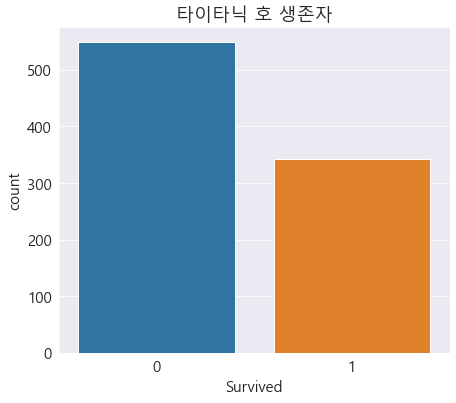

In [553]:
mpl.rc('font' , size =15) # 폰트 크기 설정
plt.figure(figsize=(7,6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯

ax = sns.countplot(x='Survived' , data = train_bin)
ax.set_title('타이타닉 호 생존자')

In [554]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이 : ' , rectangle.get_height())
print('사각형 너비 : ' , rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치 : ' , rectangle.get_x())

사각형 높이 :  549
사각형 너비 :  0.8
사각형 왼쪽 테두리의 x축 위치 :  -0.4


Text(0.5, 1.0, '타이타닉 호 생존자')

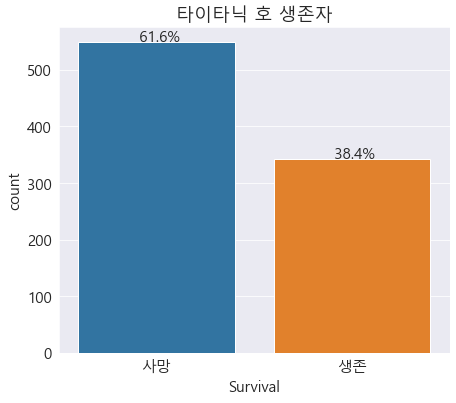

In [555]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



plt.figure(figsize=(7,6))
train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
ax = sns.countplot(x='Survival' , data = train_bin)
write_percent(ax , len(train)) # 비율 표시
ax.set_title('타이타닉 호 생존자')

## 연속형 피처 분포

In [556]:
train_bin

,Survived,Pclass,Age,SibSp,Parch,Fare,Survival
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,사망
2,1,1,38.0,1,0,71.2833,생존
3,1,3,26.0,0,0,7.9250,생존
4,1,1,35.0,1,0,53.1000,생존
5,0,3,35.0,0,0,8.0500,사망
...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,사망
888,1,1,19.0,0,0,30.0000,생존
889,0,3,24.0,1,2,23.4500,사망


In [557]:
train_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survival  891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 88.0+ KB


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

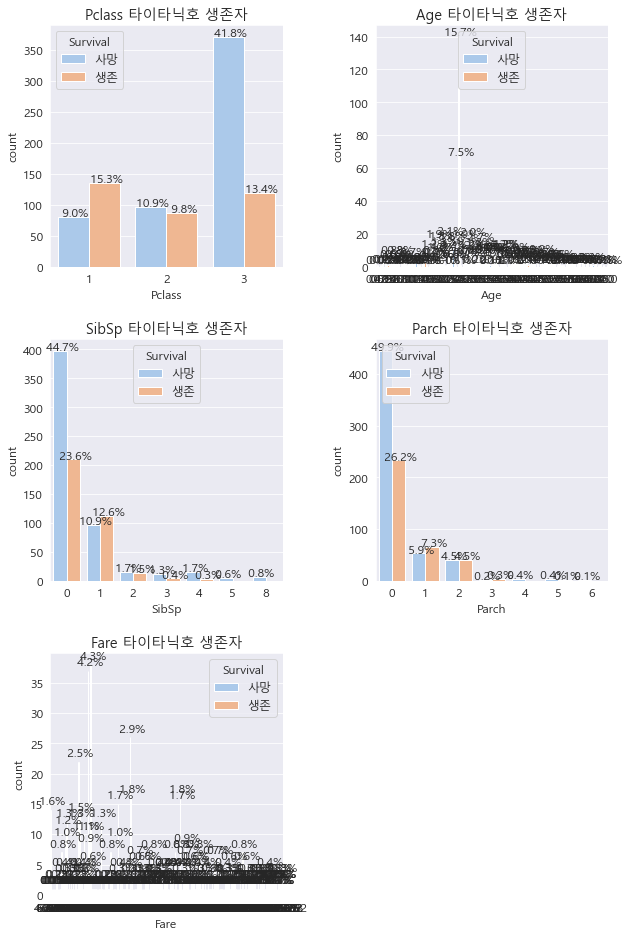

In [558]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(binary_col[1:]) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = train_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(train_bin))



# binary_col은 2진 피처가 아니다. 명목형 피처라 해도 될거 같다.

## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

### 'Fare' 활용하기'

In [559]:
width = (max(train_bin['Fare']) - min(train['Fare'])) // 5 #계급 간격 구하는 공식
width

102.000

[838  33  17   0   0]
[  0. 102. 204. 306. 408. 510.]


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text major ticklabel objects>)

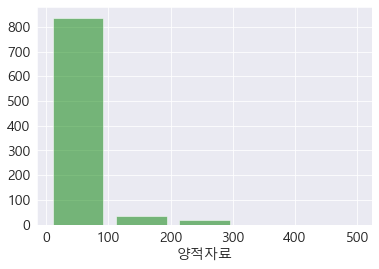

In [560]:
bins = np.arange(min(train_bin['Fare']), max(train_bin['Fare']), width)


hist, bins = np.histogram(train_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(train_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [561]:
# PClass 등급별 Fare 중앙값(median) 계산
fare_medians = train_bin[train_bin['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in train_bin.iterrows():
    if row['Fare'] == 0:
        train_bin.at[i, 'Fare'] = fare_medians[row['Pclass']]

# 결과 확인
train_bin.loc[816:824]

,Survived,Pclass,Age,SibSp,Parch,Fare,Survival
PassengerId,,,,,,,
816,0,1,24.0,0,0,61.9792,사망
817,0,3,23.0,0,0,7.9250,사망
818,0,2,31.0,1,1,37.0042,사망
819,0,3,43.0,0,0,6.4500,사망
820,0,3,10.0,3,2,27.9000,사망
821,1,1,52.0,1,1,93.5000,생존
822,1,3,27.0,0,0,8.6625,생존
823,0,1,38.0,0,0,61.9792,사망
824,1,3,27.0,0,1,12.4750,생존


In [562]:
train_bin['log_Fare'] = np.log(train_bin['Fare'])
min_log_fare = min(train_bin['log_Fare'])
min_log_fare_row = train_bin[train_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




             Survived  Pclass   Age  SibSp  Parch    Fare Survival  log_Fare
PassengerId                                                                 
379                 0       3  20.0      0      0  4.0125       사망  1.389414


width : 0.9699105797435055
6.238967387173662
1.3894144884561344
hist : [353 281 160  77]
bins : [1.389 2.359 3.329 4.299 5.269]


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

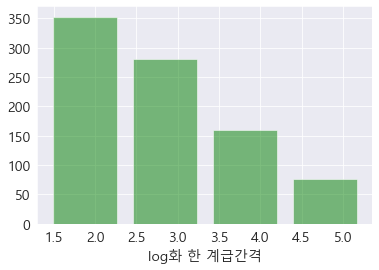

In [563]:
width = (max(train_bin['log_Fare']) - min(train_bin['log_Fare'])) / 5 #계급 간격 구하는 공식
print(f'width : {width}')
print(max(train_bin['log_Fare']))
print(min(train_bin['log_Fare']))
bins = np.arange(min(train_bin['log_Fare']), max(train_bin['log_Fare']), width)
hist, bins = np.histogram(train_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(train_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [564]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(train_bin['log_Fare']), max(train_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(train_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = train_bin['log_Fare'].min()
max_val = train_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
train_bin['Fare_binned'] = pd.cut(train_bin['log_Fare'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
train_bin


[1.389 2.359 3.329 4.299 5.269]


,Survived,Pclass,Age,SibSp,Parch,Fare,Survival,log_Fare,Fare_binned
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,사망,1.981001,1.4
2,1,1,38.0,1,0,71.2833,생존,4.266662,3.3
3,1,3,26.0,0,0,7.9250,생존,2.070022,1.4
4,1,1,35.0,1,0,53.1000,생존,3.972177,3.3
5,0,3,35.0,0,0,8.0500,사망,2.085672,1.4
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,사망,2.564949,2.4
888,1,1,19.0,0,0,30.0000,생존,3.401197,3.3
889,0,3,24.0,1,2,23.4500,사망,3.154870,2.4


In [565]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
train_bin['Fare_binned_범위'] = pd.cut(train_bin['log_Fare'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
train_bin

,Survived,Pclass,Age,SibSp,Parch,Fare,Survival,log_Fare,Fare_binned,Fare_binned_범위
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,사망,1.981001,1.4,1.4~2.4
2,1,1,38.0,1,0,71.2833,생존,4.266662,3.3,3.3~4.3
3,1,3,26.0,0,0,7.9250,생존,2.070022,1.4,1.4~2.4
4,1,1,35.0,1,0,53.1000,생존,3.972177,3.3,3.3~4.3
5,0,3,35.0,0,0,8.0500,사망,2.085672,1.4,1.4~2.4
...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,사망,2.564949,2.4,1.4~2.4
888,1,1,19.0,0,0,30.0000,생존,3.401197,3.3,2.4~3.3
889,0,3,24.0,1,2,23.4500,사망,3.154870,2.4,2.4~3.3


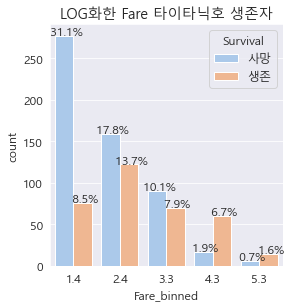

In [566]:
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = train_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(train_bin))



In [567]:
bins_exp = np.exp(bins)
bins_exp

array([  4.013,  10.584,  27.917,  73.637, 194.233])

### 'AGE' 계급간격 구하기

In [568]:
train_bin['Age'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

[ 44  20  19  96 299 108  88  67  47  39  24  18  14   3   4]
[ 0.42  5.42 10.42 15.42 20.42 25.42 30.42 35.42 40.42 45.42 50.42 55.42
 60.42 65.42 70.42 75.42]


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

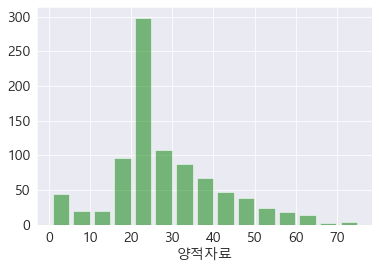

In [569]:
bins = np.arange(min(train_bin['Age']), max(train_bin['Age']), width)


hist, bins = np.histogram(train_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(train_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

width : 7.958
80.0
0.42
hist : [ 62 102 397 167  89  48  19   7]
bins : [ 0 10 20 30 40 50 60 70 80]


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

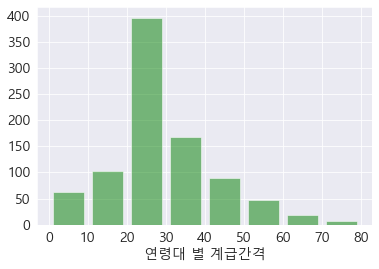

In [570]:
width = (max(train_bin['Age']) - min(train_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(train_bin['Age']))
print(min(train_bin['Age']))
bins = np.arange(0,90,10)
hist, bins = np.histogram(train_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(train_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [571]:
labels = [f'{i}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
train_bin['Age_Categorical'] = pd.cut(train_bin['Age'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
train_bin

,Survived,Pclass,Age,SibSp,Parch,Fare,Survival,log_Fare,Fare_binned,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,사망,1.981001,1.4,1.4~2.4,20
2,1,1,38.0,1,0,71.2833,생존,4.266662,3.3,3.3~4.3,40
3,1,3,26.0,0,0,7.9250,생존,2.070022,1.4,1.4~2.4,20
4,1,1,35.0,1,0,53.1000,생존,3.972177,3.3,3.3~4.3,30
5,0,3,35.0,0,0,8.0500,사망,2.085672,1.4,1.4~2.4,30
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,사망,2.564949,2.4,1.4~2.4,30
888,1,1,19.0,0,0,30.0000,생존,3.401197,3.3,2.4~3.3,20
889,0,3,24.0,1,2,23.4500,사망,3.154870,2.4,2.4~3.3,20


In [572]:
age_cat_with_daes = train_bin['Age_Categorical'].apply(lambda x: str(x)+'대')

# train_bin['Age_Categorical'] 열 대체
train_bin['Age_Categorical'] = age_cat_with_daes

train_bin

,Survived,Pclass,Age,SibSp,Parch,Fare,Survival,log_Fare,Fare_binned,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,사망,1.981001,1.4,1.4~2.4,20대
2,1,1,38.0,1,0,71.2833,생존,4.266662,3.3,3.3~4.3,40대
3,1,3,26.0,0,0,7.9250,생존,2.070022,1.4,1.4~2.4,20대
4,1,1,35.0,1,0,53.1000,생존,3.972177,3.3,3.3~4.3,30대
5,0,3,35.0,0,0,8.0500,사망,2.085672,1.4,1.4~2.4,30대
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,사망,2.564949,2.4,1.4~2.4,30대
888,1,1,19.0,0,0,30.0000,생존,3.401197,3.3,2.4~3.3,20대
889,0,3,24.0,1,2,23.4500,사망,3.154870,2.4,2.4~3.3,20대


In [573]:
train_bin.columns.tolist()

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Survival',
 'log_Fare',
 'Fare_binned',
 'Fare_binned_범위',
 'Age_Categorical']

In [574]:
train_bin2 = train_bin[['Pclass' ,'SibSp','Parch' ,'Survival' , 'Fare_binned_범위' , 'Age_Categorical']]
train_bin2

,Pclass,SibSp,Parch,Survival,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,
1,3,1,0,사망,1.4~2.4,20대
2,1,1,0,생존,3.3~4.3,40대
3,3,0,0,생존,1.4~2.4,20대
4,1,1,0,생존,3.3~4.3,30대
5,3,0,0,사망,1.4~2.4,30대
...,...,...,...,...,...,...
887,2,0,0,사망,1.4~2.4,30대
888,1,0,0,생존,2.4~3.3,20대
889,3,1,2,사망,2.4~3.3,20대


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


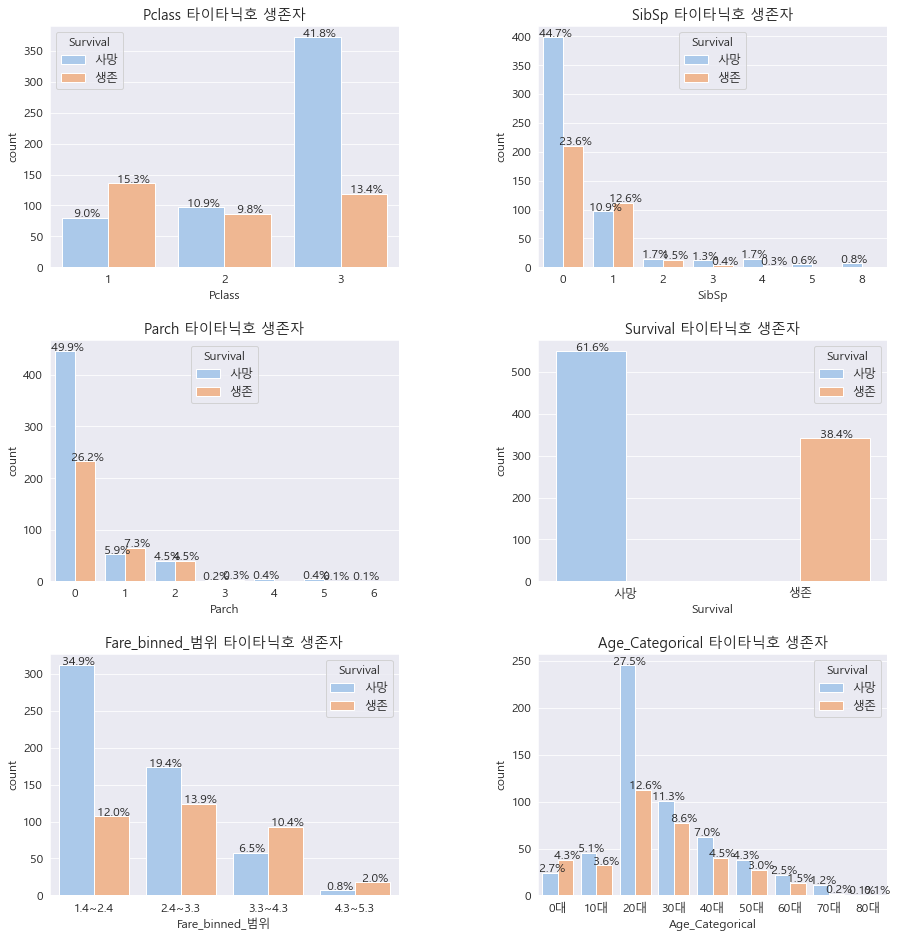

In [575]:
# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(15,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(train_bin2.columns.tolist()) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = train_bin2 , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(train_bin2))



# binary_col은 2진 피처가 아니다. 명목형 피처라 해도 될거 같다.

## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [576]:
train_obj

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,S
888,"Graham, Miss. Margaret Edith",female,112053,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S


In [577]:
train_bin2

,Pclass,SibSp,Parch,Survival,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,
1,3,1,0,사망,1.4~2.4,20대
2,1,1,0,생존,3.3~4.3,40대
3,3,0,0,생존,1.4~2.4,20대
4,1,1,0,생존,3.3~4.3,30대
5,3,0,0,사망,1.4~2.4,30대
...,...,...,...,...,...,...
887,2,0,0,사망,1.4~2.4,30대
888,1,0,0,생존,2.4~3.3,20대
889,3,1,2,사망,2.4~3.3,20대


## 내 생각엔 Name은 필요 없을 거 같고 , 'Sex'와 'Embarked' 만 필요할거 같다.

In [578]:
train_obj = train_obj[['Sex' , 'Embarked']]
train_obj

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
887,male,S
888,female,S
889,female,S


In [579]:
train_obj2 =  pd.merge(train_obj, train_bin2['Survival'] , how='outer' , on=('PassengerId'))
train_obj2

,Sex,Embarked,Survival
PassengerId,,,
1,male,S,사망
2,female,C,생존
3,female,S,생존
4,female,S,생존
5,male,S,사망
...,...,...,...
887,male,S,사망
888,female,S,생존
889,female,S,사망


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


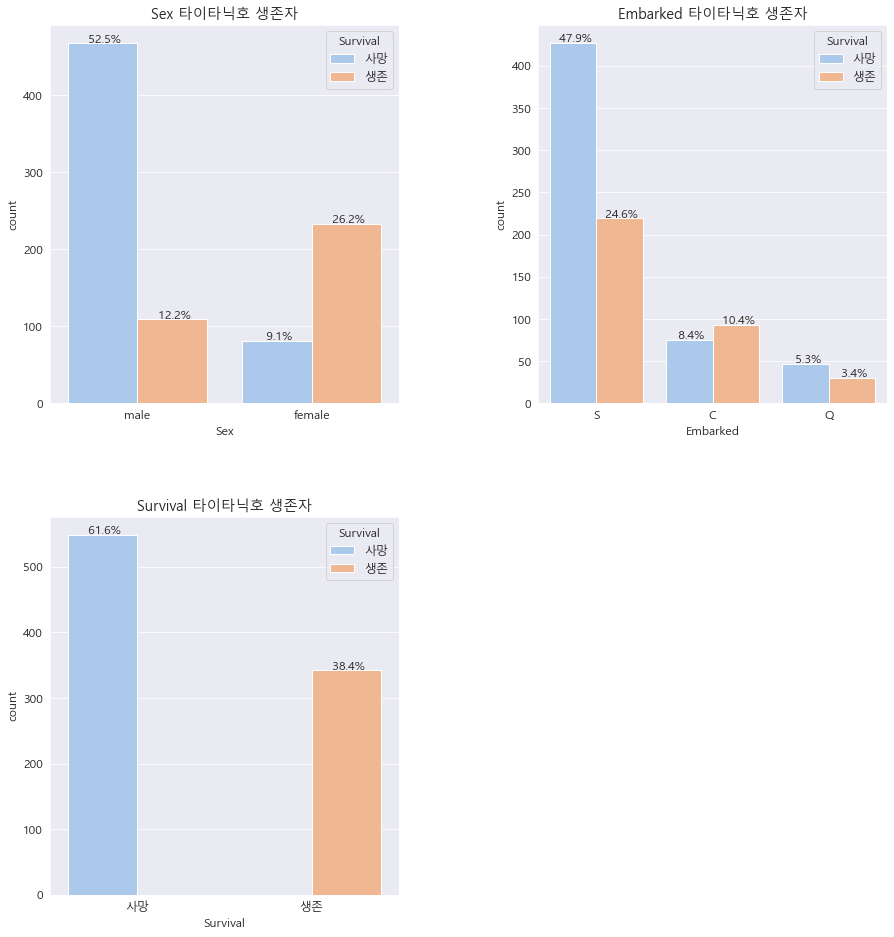

In [580]:
# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(2,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(15,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(train_obj2.columns.tolist()) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = train_obj2 , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(train_bin2))


In [581]:
train_data = pd.merge(train_obj , train_bin2, how='outer' , on=('PassengerId'))

train_data

,Sex,Embarked,Pclass,SibSp,Parch,Survival,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,,,
1,male,S,3,1,0,사망,1.4~2.4,20대
2,female,C,1,1,0,생존,3.3~4.3,40대
3,female,S,3,0,0,생존,1.4~2.4,20대
4,female,S,1,1,0,생존,3.3~4.3,30대
5,male,S,3,0,0,사망,1.4~2.4,30대
...,...,...,...,...,...,...,...,...
887,male,S,2,0,0,사망,1.4~2.4,30대
888,female,S,1,0,0,생존,2.4~3.3,20대
889,female,S,3,1,2,사망,2.4~3.3,20대
